In [19]:
#==============================================================================
# Import modules
#==============================================================================

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       460 non-null    int64  
 1   age              460 non-null    float64
 2   antenna_length   460 non-null    float64
 3   blood_blueness   460 non-null    float64
 4   chest_radius     460 non-null    float64
 5   height           460 non-null    float64
 6   salt_levels      460 non-null    float64
 7   siblings         460 non-null    float64
 8   skin_coarseness  460 non-null    float64
 9   target           460 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 36.1 KB


In [4]:
print(data.isnull().sum())

Unnamed: 0         0
age                0
antenna_length     0
blood_blueness     0
chest_radius       0
height             0
salt_levels        0
siblings           0
skin_coarseness    0
target             0
dtype: int64


In [5]:
data.describe()

,Unnamed: 0,age,antenna_length,blood_blueness,chest_radius,height,salt_levels,siblings,skin_coarseness,target
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,229.500000,101.595652,86.584212,363.308958,463.633348,97.894677,1.417702,11.830435,217.801913,0.350000
std,132.934821,37.029835,25.490705,93.721120,251.634997,21.608769,1.002476,10.309457,36.887748,0.477489
min,0.000000,63.000000,21.000000,132.000000,42.000000,54.600000,0.234000,0.000000,90.000000,0.000000
25%,114.750000,72.000000,75.000000,297.000000,360.000000,82.800000,0.714000,3.000000,192.000000,0.000000
50%,229.500000,88.500000,87.460259,351.000000,466.644670,96.750000,1.078500,9.000000,216.000000,0.000000
75%,344.250000,123.000000,96.000000,423.000000,466.644670,109.275000,1.913250,18.000000,240.000000,1.000000
max,459.000000,243.000000,189.000000,597.000000,2538.000000,201.300000,7.260000,51.000000,342.000000,1.000000


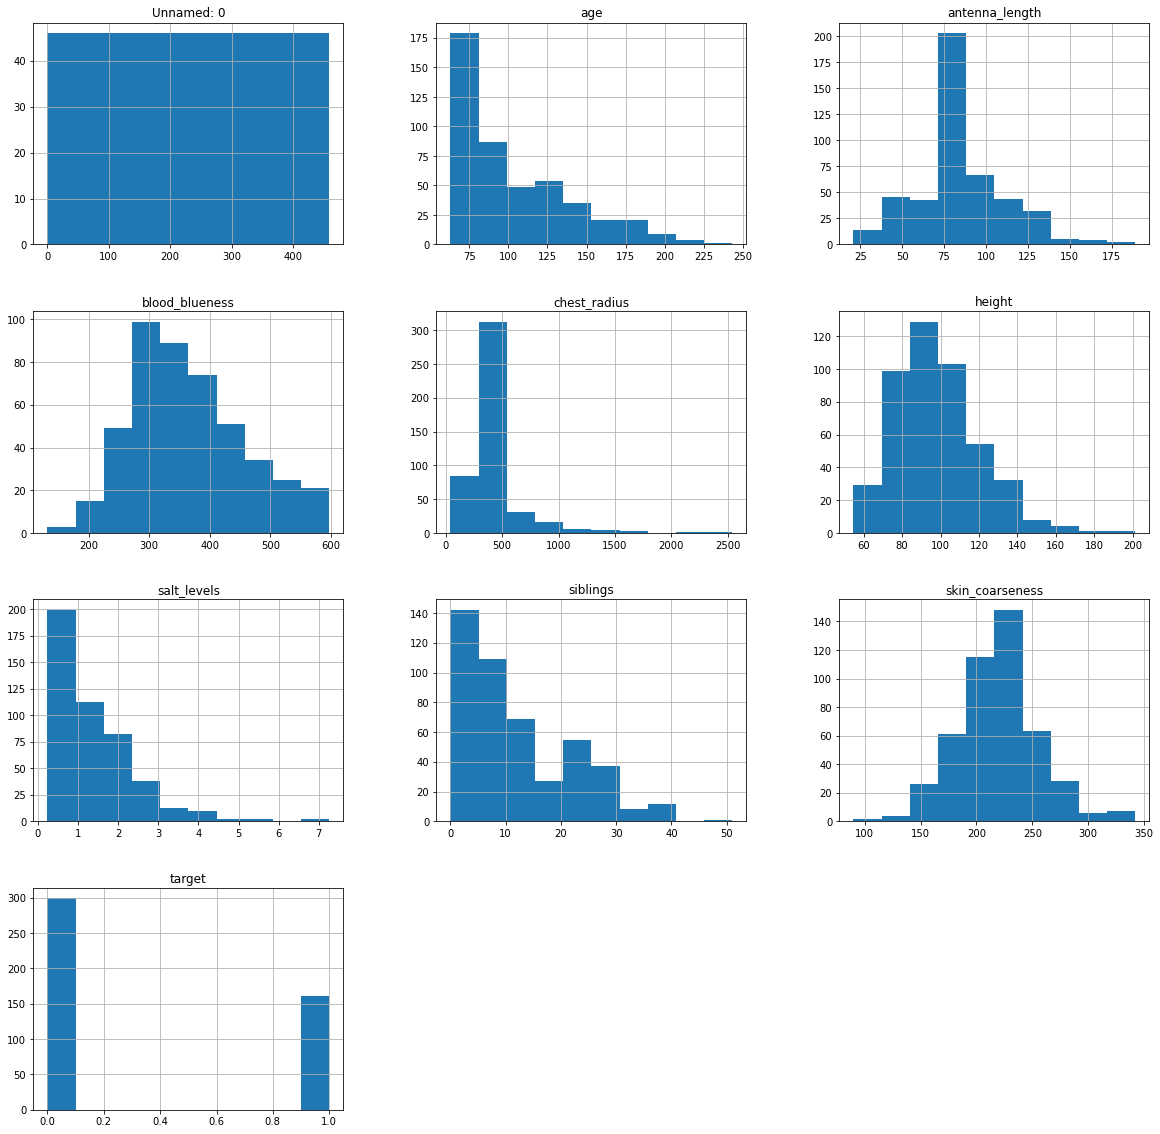

In [6]:
data.hist(figsize=(20,20))
plt.show()

In [7]:
data.head()

,Unnamed: 0,age,antenna_length,blood_blueness,chest_radius,height,salt_levels,siblings,skin_coarseness,target
0,0,66.0,51.000000,384.0,549.00000,82.5,0.345,3.0,246.0,0
1,1,63.0,87.460259,306.0,466.64467,75.3,0.234,0.0,156.0,0
2,2,120.0,87.460259,477.0,466.64467,82.2,0.882,21.0,192.0,0
3,3,69.0,39.000000,204.0,45.00000,60.3,0.771,6.0,186.0,0
4,4,132.0,87.460259,318.0,466.64467,70.8,0.411,36.0,240.0,0


In [8]:
data = data.iloc[:, 1:10]

In [9]:
data.columns[8]

'target'

In [10]:
data['salt_levels']

0      0.345
1      0.234
2      0.882
3      0.771
4      0.411
       ...  
455    0.615
456    0.840
457    1.617
458    1.353
459    1.146
Name: salt_levels, Length: 460, dtype: float64

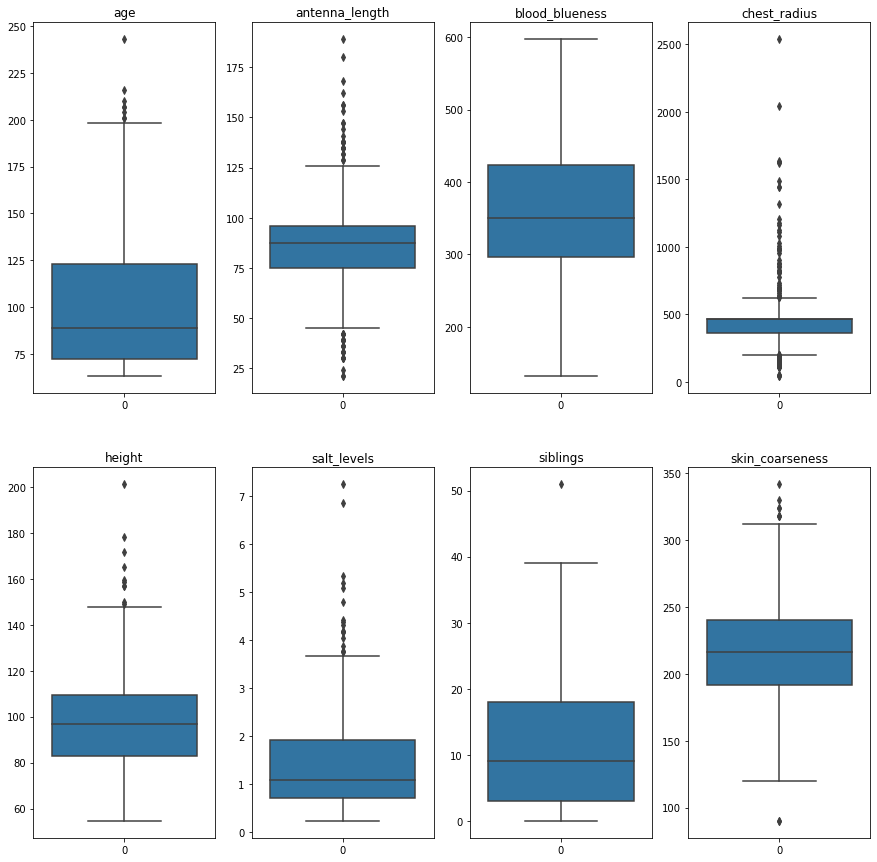

In [11]:
# Box Plots of the Columns
fig, axs = plt.subplots(2, 4,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[2])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[3])
    row += 1

In [12]:
# q_low = data["salt_levels"].quantile(0.01)
# q_hi  = data["salt_levels"].quantile(0.95)
# data = data[(data["salt_levels"] < q_hi) & (data["salt_levels"] > q_low)]

# q_low = data["chest_radius"].quantile(0.01)
# q_hi  = data["chest_radius"].quantile(0.95)
# data = data[(data["chest_radius"] < q_hi) & (data["chest_radius"] > q_low)]

# q_low = data["chest_radius"].quantile(0.01)
# q_hi  = data["chest_radius"].quantile(0.95)
# data = data[(data["chest_radius"] < q_hi) & (data["chest_radius"] > q_low)]
# print(len(data))


# for x in data.columns:
#     if x == 'chest_radius' or x == 'salt_levels':
#         print(x)
#         data[x] = np.where(data[x] > data[x].quantile(0.90),
#                                                      data[x].quantile(0.50), data[x])
    


In [13]:

# data.head()


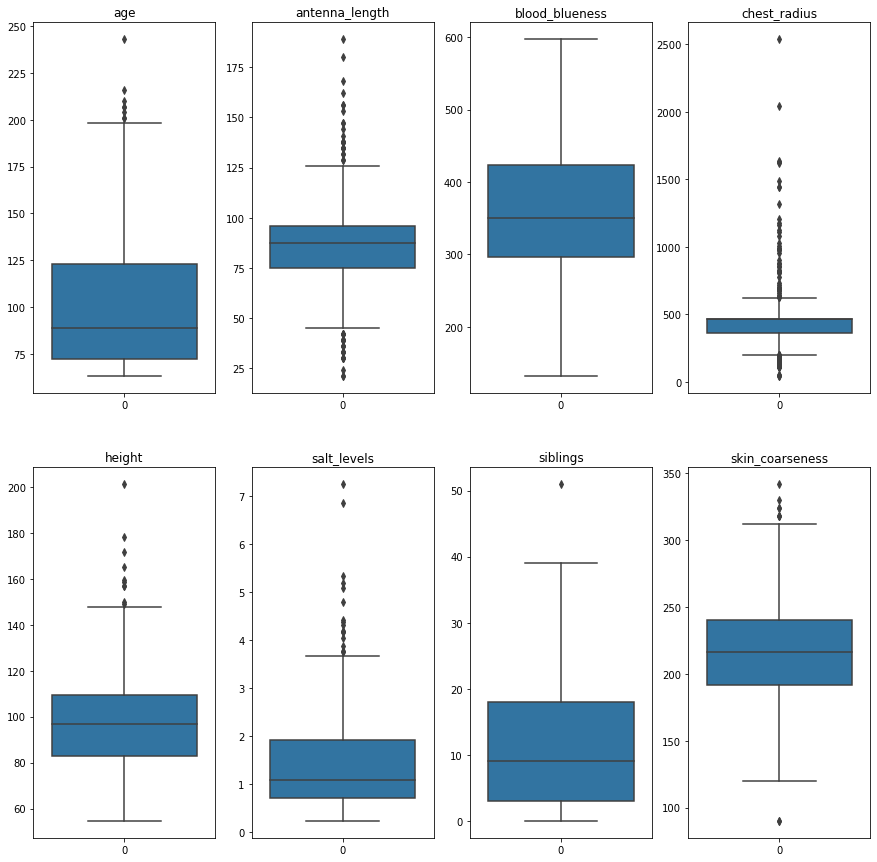

In [14]:
# Box Plots of the Columns
fig, axs = plt.subplots(2, 4,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[2])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.boxplot(data=data[data.columns[col]], ax=x[3])
    row += 1
    
#     ['age',
#  'blood_blueness',
#  'chest_radius',
#  'height',
#  'salt_levels',
#  'skin_coarseness']

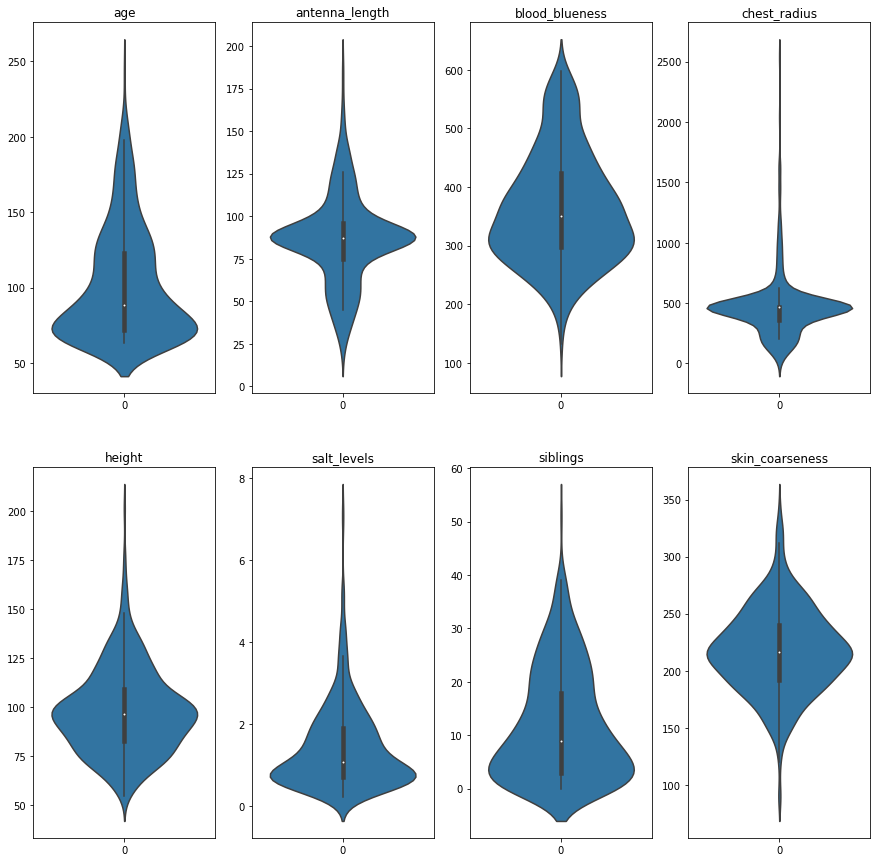

In [15]:
# Box Plots of the Columns
fig, axs = plt.subplots(2, 4,figsize=(15,15))
row = 0
col = 0
for x in axs:
    row_position = 0
    if row == 0:
        col = 0
    else:
        col += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[0])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[1])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[2])
    col += 1
    row_position += 1
    x[row_position].title.set_text(data.columns[col])
    sns.violinplot(data=data[data.columns[col]], ax=x[3])
    row += 1

In [16]:
X = data.iloc[:, 0:8]
y = data.iloc[:,8]

print(X)
print(y)

       age  antenna_length  blood_blueness  chest_radius  height  salt_levels  \
0     66.0       51.000000           384.0     549.00000    82.5        0.345   
1     63.0       87.460259           306.0     466.64467    75.3        0.234   
2    120.0       87.460259           477.0     466.64467    82.2        0.882   
3     69.0       39.000000           204.0      45.00000    60.3        0.771   
4    132.0       87.460259           318.0     466.64467    70.8        0.411   
..     ...             ...             ...           ...     ...          ...   
455   72.0       39.000000           357.0     150.00000    66.9        0.615   
456  114.0       75.000000           216.0     466.64467    94.8        0.840   
457  183.0       87.460259           438.0     466.64467    93.6        1.617   
458  123.0       87.460259           588.0     466.64467   119.4        1.353   
459  126.0       87.460259           255.0     466.64467    93.6        1.146   

     siblings  skin_coarsen

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
    # Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X_train)
# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [75]:
# Create a logistic regression classifier
lr = LogisticRegression()

knn = KNeighborsClassifier(n_neighbors=8)

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 8),  # Consider any feature combination between 1 and 4
          forward=False,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_train_std, y_train)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names 
                                                                  # that yield the best score

Best accuracy score: 0.77
Best subset (indices): (0, 2, 3, 4, 6, 7)
Best subset (corresponding names): ('0', '2', '3', '4', '6', '7')


In [31]:
X_train_new = sfs.transform(X_train_std)

In [32]:
X_train_new.shape[1]

4

In [34]:
X_test_new = sfs.transform(X_test_std)

In [35]:
X_test_new.shape[1]

4

In [18]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs



# # =============================================================================
# # Initialise KNN classifier
# # =============================================================================
# knn = KNeighborsClassifier(n_neighbors=8)



# # =============================================================================
# # Select features using Sequential Feature Selector in mlxtend
# # https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/ 
# # =============================================================================

# # Initialise Sequential Feature Selector
# sfs1 = SFS(knn, 
#            k_features=5, 
#            forward=False, 
#            floating=False, 
#            verbose=0,
#            scoring='accuracy',
#            cv=5)


In [19]:
# sfs1 = sfs1.fit(X_train_std, y_train)

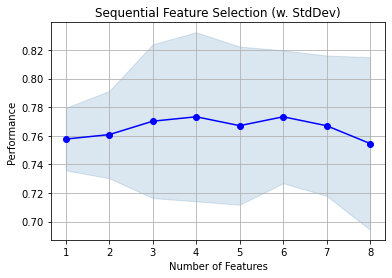

In [33]:

# This dictionary contains results from all compuations
metricDict = sfs.get_metric_dict()



# =============================================================================
# Plot performance of features
# =============================================================================

# Initialise plot
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Feature Selection (w. StdDev)')
plt.grid()
plt.show()



In [21]:
# metricDict

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.67692308, 0.73846154, 0.765625  , 0.734375  , 0.734375  ]),
  'avg_score': 0.7299519230769231,
  'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7'),
  'ci_bound': 0.03723427103212724,
  'std_dev': 0.028969527833560004,
  'std_err': 0.01448476391678},
 7: {'feature_idx': (1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.70769231, 0.70769231, 0.734375  , 0.75      , 0.796875  ]),
  'avg_score': 0.7393269230769232,
  'feature_names': ('1', '2', '3', '4', '5', '6', '7'),
  'ci_bound': 0.04244074616995511,
  'std_dev': 0.03302034237186266,
  'std_err': 0.01651017118593133},
 6: {'feature_idx': (1, 2, 3, 4, 5, 7),
  'cv_scores': array([0.66153846, 0.72307692, 0.8125    , 0.765625  , 0.796875  ]),
  'avg_score': 0.7519230769230769,
  'feature_names': ('1', '2', '3', '4', '5', '7'),
  'ci_bound': 0.0701148543472757,
  'std_dev': 0.05455173871422948,
  'std_err': 0.02727586935711474},
 5: {'feature_idx': (2, 3, 4, 5, 7),


In [22]:
# sfs1.k_feature_idx_

(2, 3, 4, 5, 7)

In [23]:
# sfs1.k_feature_names_

('2', '3', '4', '5', '7')

In [24]:
# # Get names of best features using numpy arrays
# k_ind = sfs1.k_feature_idx_
# bestFeatures_names = [data.columns[i] for i in k_ind]

In [25]:
# bestFeatures_names

['blood_blueness', 'chest_radius', 'height', 'salt_levels', 'skin_coarseness']

In [26]:

# check = X_train_std[:, k_ind]

In [27]:
# check2 = X_test_std[:, k_ind]

In [47]:
score_highest = 0
accuracy_score = 0
f1 = 0
model_highest_name = ''
best_epoch = 0
best_eta = 0
best_pen = ''
etas = [0.001,0.01,0.1,1,10,100,1000]
penalties = ['l1','l2']
#for rs in range(1,101):



## Perceptron
for pen in penalties:
    for eta in etas:
        for epoch in range(25,100,5):
            ppn = Perceptron(max_iter=epoch,eta0=eta, random_state=1,penalty=pen)
            ppn.fit(X_train_new,y_train)
            y_pred = ppn.predict(X_test_new)
            #score = ppn.score(X_test_new, y_test)
            score = f1_score(y_test, y_pred)
            #print(str(score) + '   ' + str(score_highest))
            if score > score_highest:
                score_highest = score
                accuracy_score = ppn.score(X_test_new, y_test)
                #best_rs =rs
                f1 = score
                best_epoch = epoch
                best_eta =  eta
                best_pen = pen
                best_model = ppn
                best_standarizer = sc
                model_highest_name = 'Perceptron'
    

print(accuracy_score)
#print(best_rs)
print(f1)
print(best_eta)
print(best_epoch)
print(best_pen)

0.7753623188405797
0.617283950617284
0.01
25
l2


In [74]:
score_highest = 0
f1 = 0
accuracy_score = 0
best_c = 0
etas = [0.001,0.01,0.1,1,10,100,1000]
penalties = ['l1','l2']
# for rs in range(1,101):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=rs, stratify=y)
#         # Initialise standard scaler and compute mean and STD from training data
#     sc = StandardScaler()
#     sc.fit(X_train)
#     # Transform (standardise) both X_train and X_test with mean and STD from
#     # training data
#     X_train_std = sc.transform(X_train)
#     X_test_std = sc.transform(X_test)

## lr
for pen in penalties:
    for c in etas:
        lr = LogisticRegression(C=c, 
                        penalty=pen,
                        random_state=1,
                        solver='liblinear')
        lr.fit(X_train_new,y_train)
        y_pred = lr.predict(X_test_new)
        #score = lr.score(X_test_new, y_test)
        score = f1_score(y_test, y_pred)
        if score > score_highest:
            score_highest = score
            accuracy_score = lr.score(X_test_new, y_test)
            #best_rs =rs
            best_c = c
            f1 = score
            best_model = lr
            best_standarizer = sc
            model_highest_name = 'Logistic Regression'

print(accuracy_score)
#print(best_rs)
print(f1)
print(best_c)

0.7753623188405797
0.6436781609195402
0.1


In [51]:
score_highest = 0
f1 = 0
accuracy_score= 0 
best_c = 0
etas = [0.001,0.01,0.1,1,10,100,1000]
#penalties = ['l1','l2']
# for rs in range(1,101):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=rs, stratify=y)
#         # Initialise standard scaler and compute mean and STD from training data
#     sc = StandardScaler()
#     sc.fit(X_train)
#     # Transform (standardise) both X_train and X_test with mean and STD from
#     # training data
#     X_train_std = sc.transform(X_train)
#     X_test_std = sc.transform(X_test)

## svc linear
for c in etas:
    svc = SVC(kernel='linear', C=c, random_state=1)
    svc.fit(X_train_new,y_train)
    y_pred = svc.predict(X_test_new)
    #score = svc.score(check2, y_test)
    score = f1_score(y_test, y_pred)
    if score > score_highest:
        score_highest = score
        accuracy_score = svc.score(X_test_new, y_test)
        #best_rs =rs
        best_c = c
        f1 =  score
        best_model = svc
        best_standarizer = sc
        model_highest_name = 'SVM Linear'

print(accuracy_score)
#print(best_rs)
print(f1)
print(best_c)

0.7681159420289855
0.619047619047619
0.1


In [53]:
score_highest = 0
f1 = 0
accuracy_score= 0 
best_c = 0
best_gamma = 0
etas = [0.001,0.01,0.1,1,10,100,1000]
gammas= [0.0001, 0.001, 0.01, 0.1,1,10]
#penalties = ['l1','l2']
# for rs in range(1,101):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=rs, stratify=y)
#         # Initialise standard scaler and compute mean and STD from training data
#     sc = StandardScaler()
#     sc.fit(X_train)
#     # Transform (standardise) both X_train and X_test with mean and STD from
#     # training data
#     X_train_std = sc.transform(X_train)
#     X_test_std = sc.transform(X_test)

## svc linear
for c in etas:
    for gm in gammas:
        svc = SVC(kernel='rbf', C=c, random_state=1,gamma=gm)
        svc.fit(X_train_new,y_train)
        y_pred = svc.predict(X_test_new)
        #score = svc.score(check2, y_test)
        score = f1_score(y_test, y_pred)
        if score > score_highest:
            score_highest = score
            accuracy_score = svc.score(X_test_new, y_test)
            #best_rs =rs
            best_c = c
            f1 = score
            best_gamma = gm
            best_model = svc
            best_standarizer = sc
            model_highest_name = 'SVM rbf'

print(accuracy_score)
#print(best_rs)
print(f1)
print(best_c)
print(best_gamma)

0.782608695652174
0.6428571428571429
10
0.01


In [71]:
score_highest = 0
f1 = 0
accuracy_score= 0 
best_criteria = ''
best_depth = 0
criterias = ['gini', 'entropy']
#penalties = ['l1','l2']
# for rs in range(1,101):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=rs, stratify=y)
#         # Initialise standard scaler and compute mean and STD from training data
#     sc = StandardScaler()
#     sc.fit(X_train)
#     # Transform (standardise) both X_train and X_test with mean and STD from
#     # training data
#     X_train_std = sc.transform(X_train)
#     X_test_std = sc.transform(X_test)

## svc linear
for criteria in criterias:
    for depth in range(2,21,2):
        tree = DecisionTreeClassifier(criterion=criteria,
                          max_depth=depth,
                          random_state=1)
        tree.fit(X_train_new,y_train)
        y_pred = tree.predict(X_test_new)
        #score = tree.score(check2, y_test)
        score = f1_score(y_test, y_pred)
        if score > score_highest:
            score_highest = score
            accuracy_score= tree.score(X_test_new, y_test)
            best_depth = depth
            f1 = score
            best_criteria = criteria
            best_model = tree
            best_standarizer = sc
            model_highest_name = 'Decision Tree'

print(accuracy_score)
#print(best_rs)
print(f1)
print(best_depth)
print(best_criteria)

0.717391304347826
0.6213592233009707
4
entropy


In [72]:
score_highest = 0
f1 = 0
best_criteria = ''
accuracy_score= 0 
best_depth = 0
best_estimator = 0
criterias = ['gini', 'entropy']
#penalties = ['l1','l2']
# for rs in range(1,101):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=rs, stratify=y)
#         # Initialise standard scaler and compute mean and STD from training data
#     sc = StandardScaler()
#     sc.fit(X_train)
#     # Transform (standardise) both X_train and X_test with mean and STD from
#     # training data
#     X_train_std = sc.transform(X_train)
#     X_test_std = sc.transform(X_test)

## svc linear
for criteria in criterias:
    for esimator in range(2,31,2):
        for depth in range(2,21,2):
            forest = RandomForestClassifier(n_estimators=esimator,max_depth=depth ,random_state=1,
                                n_jobs=-1)
            forest.fit(X_train_new,y_train)
            y_pred = forest.predict(X_test_new)
            #score = forest.score(check2, y_test)
            score = f1_score(y_test, y_pred)
            if score > score_highest:
                score_highest = score
                accuracy_score= forest.score(X_test_new, y_test)
                best_depth = depth
                f1 = score
                best_criteria = criteria
                best_estimator = esimator
                best_model = forest
                best_standarizer = sc
                model_highest_name = 'Random Forrest'


print(accuracy_score)
#print(best_rs)
print(f1)
print(best_depth)
print(best_criteria)
print(best_estimator)

0.7753623188405797
0.6436781609195402
4
gini
18


In [73]:
score_highest = 0
f1 = 0
accuracy_score= 0 
best_k = 0
best_p = 0
#penalties = ['l1','l2']
# for rs in range(1,101):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.3, random_state=rs, stratify=y)
#         # Initialise standard scaler and compute mean and STD from training data
#     sc = StandardScaler()
#     sc.fit(X_train)
#     # Transform (standardise) both X_train and X_test with mean and STD from
#     # training data
#     X_train_std = sc.transform(X_train)
#     X_test_std = sc.transform(X_test)

## svc linear
for k in range(1,11,1):
    for p in range(1,11,1):
        knn = KNeighborsClassifier(n_neighbors=k, 
                                   metric='minkowski',
                                   p=p,
                                   n_jobs=-1)
        knn.fit(X_train_new,y_train)
        y_pred = knn.predict(X_test_new)
        #score = knn.score(check2, y_test)
        score = f1_score(y_test, y_pred)
        if score > score_highest:
            score_highest = score
            accuracy_score = knn.score(X_test_new, y_test)
            best_depth = depth
            f1 = score
            best_k = k
            best_p = p
            best_model = knn
            best_standarizer = sc
            model_highest_name = 'KNN'
            
print(accuracy_score)
#print(best_rs)
print(f1)
print(best_k)
print(best_p)

0.7681159420289855
0.6363636363636365
7
1


In [35]:
print(score_highest)
print(f1)
print(model_highest_name)

0.7246376811594203
0.525
KNN


In [36]:
data_test = pd.read_csv("test.csv")
data_test = data_test.iloc[:, 1:9]
data_test_std = best_standarizer.transform(data_test)
data_test_std = data_test_std[:, k_ind]
test_pred = best_model.predict(data_test_std)
data = {'Predicted':test_pred} 

df = pd.DataFrame(data) 
df.index.name = 'Id'

In [ ]:
#df.to_csv('my_submission.csv')

In [ ]:
print(test_pred)